In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as skmetrics
from sklearn import linear_model, neighbors, preprocessing, model_selection, svm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Code from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


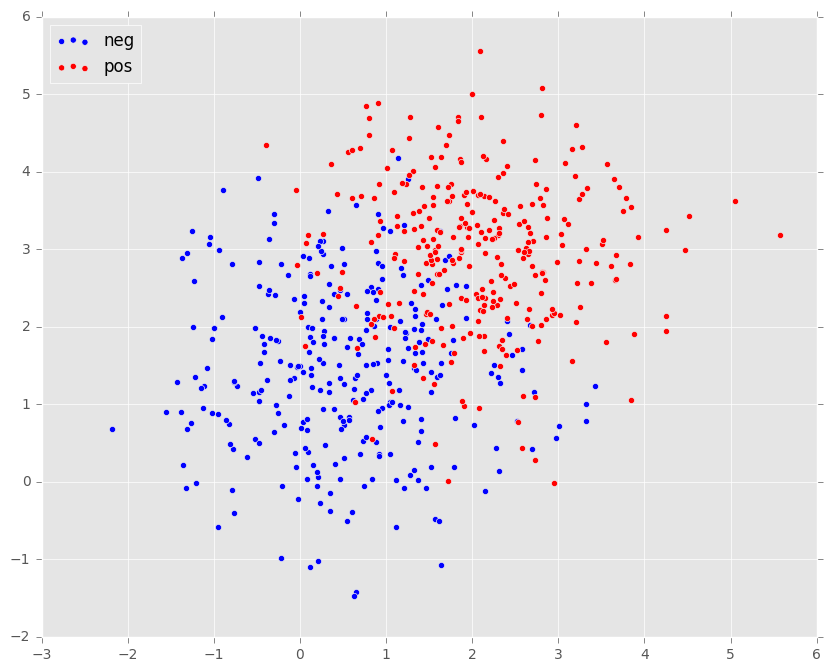

In [169]:
N = 300
X1 = (np.random.randn(N*2)).reshape((N,2)) + np.array([2,3])
X0 = (np.random.randn(N*2)).reshape((N,2)) + np.array([.5,1.5])
_ = plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
_ = plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
_ = plt.legend(loc=2)

In [217]:
n = 1000
X = np.random.uniform(size=2*n)
X.shape = (n,2)

In [105]:
def Phi(X):
    n,p = X.shape
    intercept = np.ones(n)
    Xtwo = [X[:,i]*X[:,j] for i in xrange(p) for j in xrange(i,p)]
    return(np.hstack((np.array([intercept]+Xtwo).T,X)))

In [106]:
Phi(X)

array([[  1.00000000e+00,   1.14005437e-01,   3.19331116e-01,
          8.94451739e-01,   3.37646912e-01,   9.45754587e-01],
       [  1.00000000e+00,   1.29126133e-01,   1.77079794e-01,
          2.42842040e-01,   3.59341248e-01,   4.92790056e-01],
       [  1.00000000e+00,   2.97850304e-01,   1.38805043e-01,
          6.46863193e-02,   5.45756634e-01,   2.54335053e-01],
       ..., 
       [  1.00000000e+00,   7.40893343e-01,   7.93551134e-01,
          8.49951492e-01,   8.60751615e-01,   9.21928138e-01],
       [  1.00000000e+00,   2.05514010e-01,   8.10337440e-03,
          3.19514356e-04,   4.53336530e-01,   1.78749645e-02],
       [  1.00000000e+00,   2.59081362e-01,   1.81144433e-01,
          1.26652513e-01,   5.09000356e-01,   3.55882724e-01]])

In [146]:
beta = np.array([0.,-2.,8.,-.8,-1.,-.5])

In [252]:
PhiX = Phi(X)
Pos = PhiX.dot(beta) > 0

ValueError: all the input arrays must have same number of dimensions

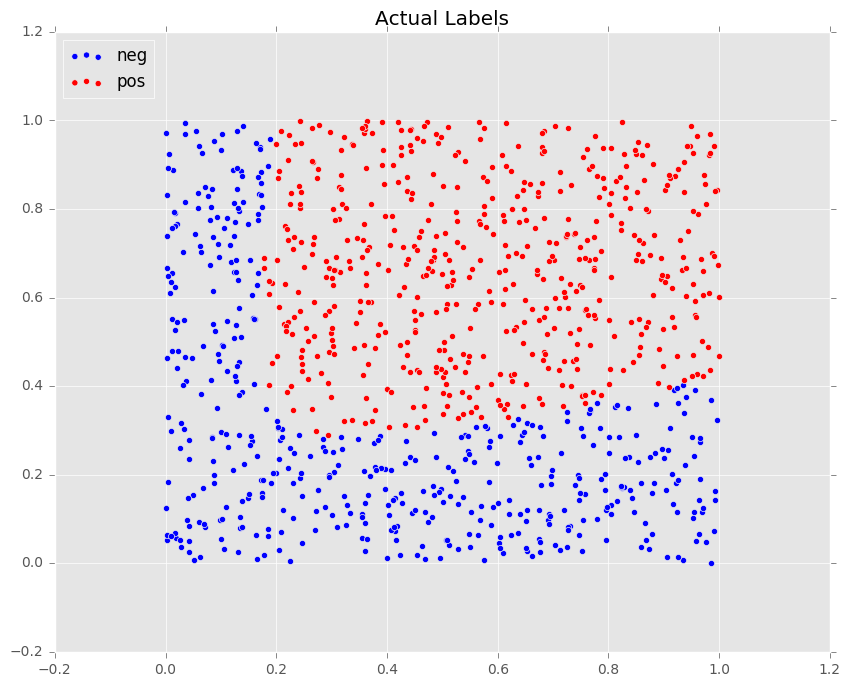

In [178]:
_ = plt.scatter(X[~Pos,0],X[~Pos,1],c='b',label='neg')
_ = plt.scatter(X[Pos,0],X[Pos,1],c='r',label='pos')
_ = plt.title("Actual Labels")
_ = plt.legend(loc=2)

In [172]:
lr = LogisticRegression()
lr.fit(X,Pos)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
PosHat = lr.predict(X)

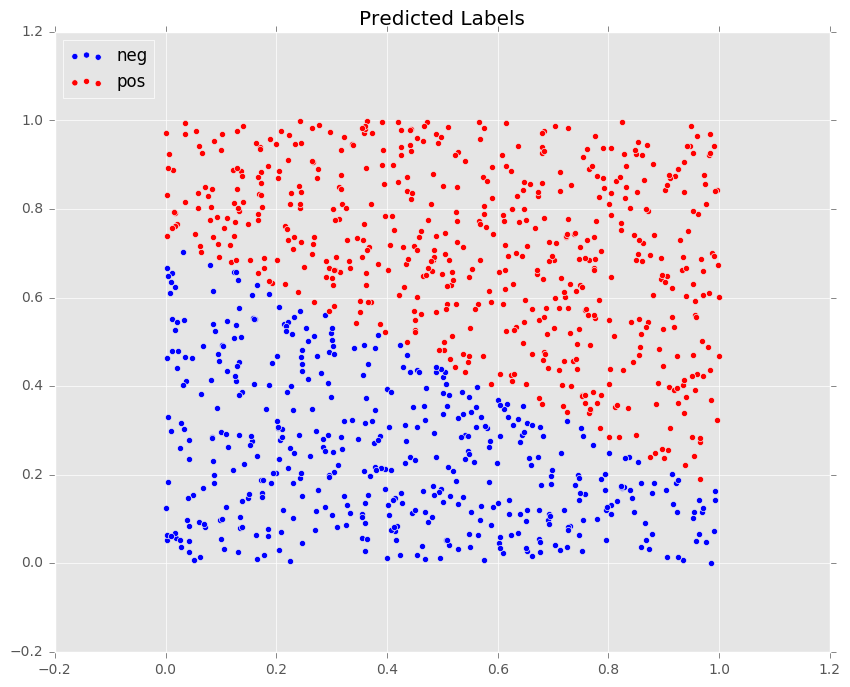

In [177]:
_ = plt.scatter(X[~PosHat,0],X[~PosHat,1],c='b',label='neg')
_ = plt.scatter(X[PosHat,0],X[PosHat,1],c='r',label='pos')
_ = plt.title("Predicted Labels")
_ = plt.legend(loc=2)

Confusion matrix, without normalization
[[361 102]
 [ 88 449]]


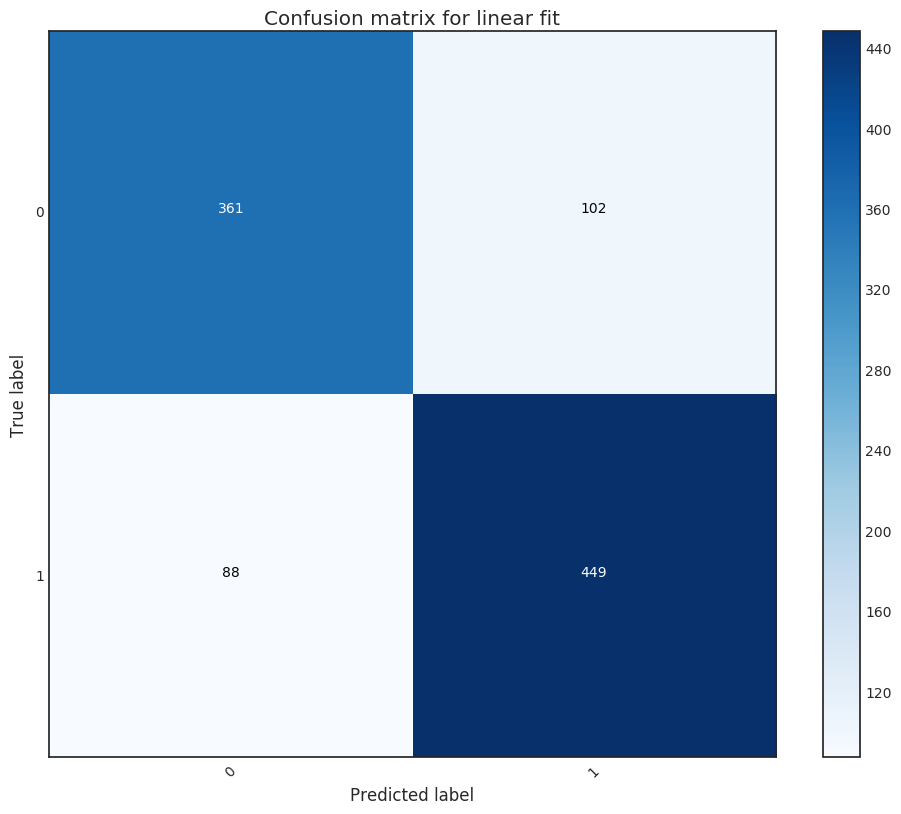

In [185]:
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(skmetrics.confusion_matrix(Pos,PosHat),[0,1],
                      title="Confusion matrix for linear fit")

In [160]:
PHtrans = np.zeros((n,2))
beta0 = beta.copy()
beta0[-3:] = 0.
PHtrans[:,0] = PhiX.dot(beta0)
beta1 = beta.copy()
beta1[:3] = 0.
PHtrans[:,1] = PhiX.dot(beta1)

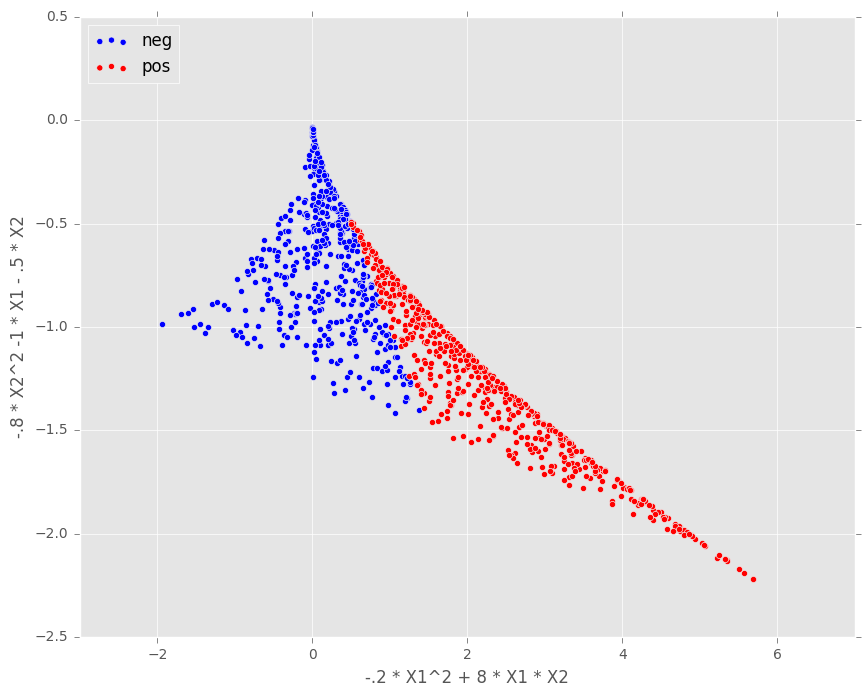

In [168]:
#0.,-2.,8.,-.8,-1.,-.5
_ = plt.scatter(PHtrans[~Pos,0],PHtrans[~Pos,1],c='b',label='neg')
_ = plt.scatter(PHtrans[Pos,0],PHtrans[Pos,1],c='r',label='pos')
_ = plt.xlabel("-.2 * X1^2 + 8 * X1 * X2")
_ = plt.ylabel("-.8 * X2^2 -1 * X1 - .5 * X2")
_ = plt.legend(loc=2)

### High dimensional embedding
$$\large \Phi (x) = (1,x_1,x_2,x_1 \cdot x_2, x_1^2, x_2^2)$$
$$\large y = \sum_{j=1}^6 \beta_j \Phi(x)_j > 0, \quad \beta = (0.,-2.,8.,-.8,-1.,-.5)$$

In [205]:
lr = LogisticRegression(fit_intercept=False,C=1e7)
lr.fit(PhiX,Pos)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [206]:
lr.coef_

array([[  -13.68445725,  -403.61748938,  1525.52823079,  -183.25915029,
         -165.54440429,   -59.49294268]])

Confusion matrix, without normalization
[[463   0]
 [  1 536]]


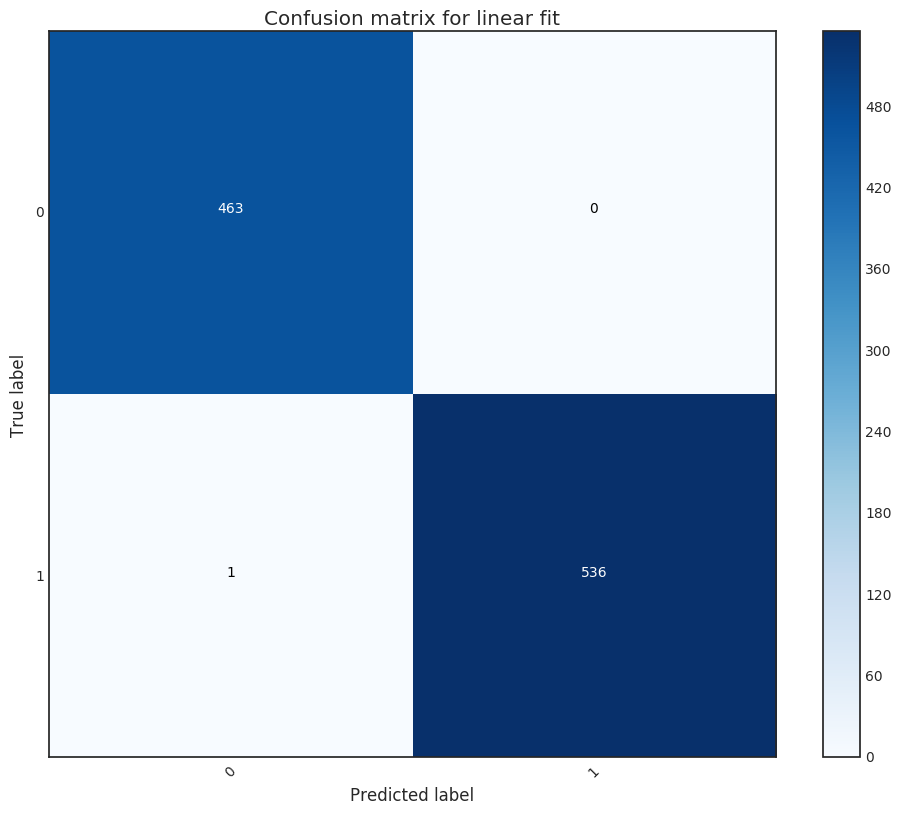

In [207]:
PosHatPhi = lr.predict(PhiX)
with plt.style.context(('seaborn-white')):
    plot_confusion_matrix(skmetrics.confusion_matrix(Pos,PosHatPhi),[0,1],
                      title="Confusion matrix for linear fit")

In [242]:
def Phi(x,deg=2):
    x = np.concatenate(([1],x))
    curvec = x.copy()
    for l in xrange(deg-1):
        Xout = np.outer(x,curvec)
        curvec = np.array([Xout[i,j] for i in xrange(len(x)) for j in xrange(i,len(curvec))])
    return(curvec)

In [246]:
PhiX = np.array([Phi(x,deg=2) for x in X])
beta = np.array([0.,-1.,-.5,-2.,8.,-.8])
Pos = PhiX[:,:6].dot(beta) > .3*np.random.randn(n)

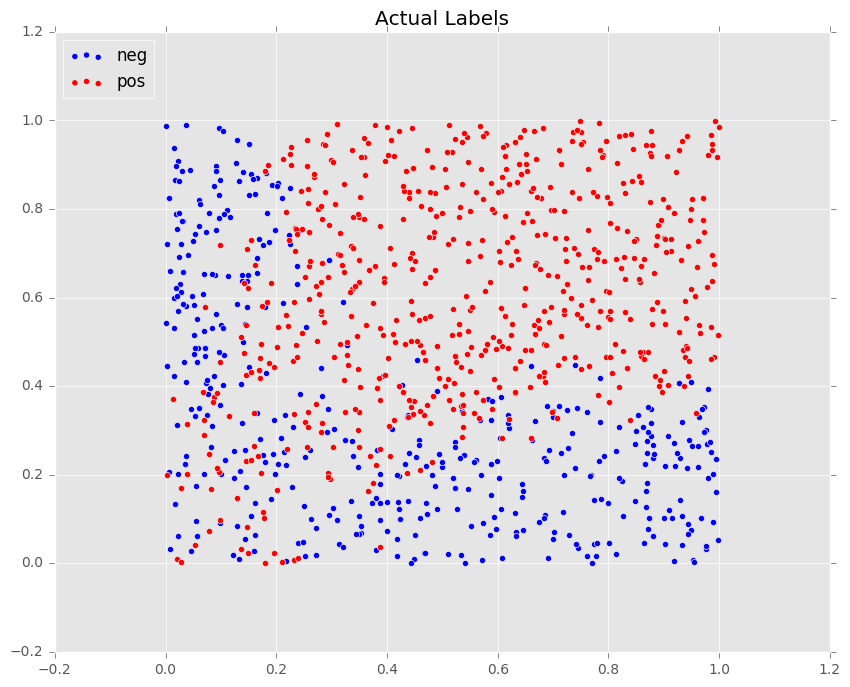

In [257]:
_ = plt.scatter(X[~Pos,0],X[~Pos,1],c='b',label='neg')
_ = plt.scatter(X[Pos,0],X[Pos,1],c='r',label='pos')
_ = plt.title("Actual Labels")
_ = plt.legend(loc=2)

In [273]:
Xte = np.random.uniform(size=2*n)
Xte.shape = (n,2)


PXte = np.array([Phi(x) for x in Xte])

In [259]:
lr = LogisticRegression(fit_intercept=False,C=1e7)
lr.fit(PhiX,Pos)

LogisticRegression(C=10000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [270]:
PhiX = np.array([Phi(x,deg=2) for x in X])
PosTe = PXte[:,:6].dot(beta) > .3*np.random.randn(n)
yhatte = lr.decision_function(PXte)

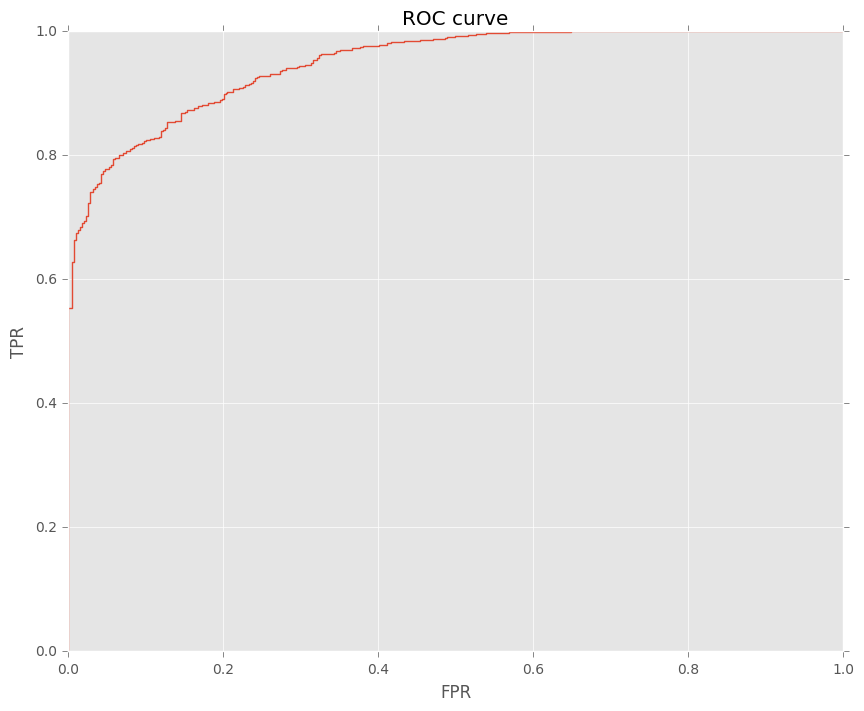

In [272]:
fpr, tpr, _ = skmetrics.roc_curve(PosTe,yhatte)

_ = plt.plot(fpr,tpr)
_ = plt.title('ROC curve')
_ = plt.xlabel('FPR')
_ = plt.ylabel('TPR')

In [316]:
def mse_pred(X,y,Xte,yte,deg=2):
    PhiX = np.array([Phi(x,deg=deg) for x in X])
    lr = LogisticRegression(fit_intercept=False)
    lr.fit(PhiX,y)
    n = len(y)
    PXte = np.array([Phi(x,deg=deg) for x in Xte])
    yhat = lr.predict(PhiX)
    yhatte = lr.predict(PXte)
    mse_tr = np.sum((yhat - y)**2.)/n
    mse_te = np.sum((yhatte - yte)**2.)/n
    return((mse_tr,mse_te))

In [317]:
PXte = np.array([Phi(x) for x in Xte])
PosTe = PXte[:,:6].dot(beta) > .5*np.random.randn(n)
MSEs = [mse_pred(X,Pos*1.,Xte,PosTe*1.,deg=k) for k in xrange(1,9)]

In [318]:
mse_trs, mse_tes = tuple(zip(*MSEs))

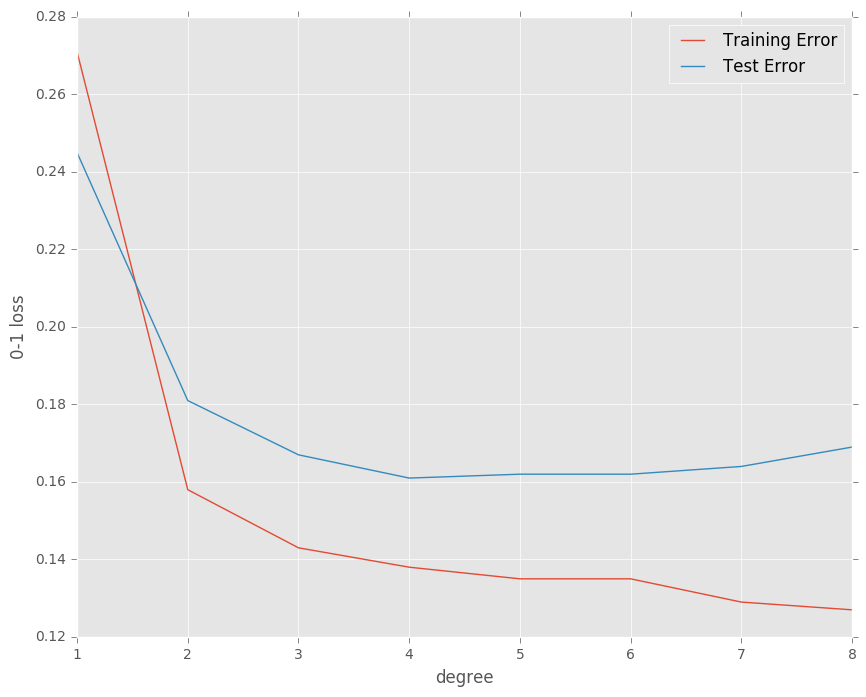

In [319]:
plt.plot(range(1,9),mse_trs,label="Training Error")
plt.plot(range(1,9),mse_tes,label="Test Error")
plt.xlabel('degree')
plt.ylabel('0-1 loss')
_ = plt.legend()

## Transfusion

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

In [346]:
Dtrans = np.loadtxt("transfusion.data",dtype=np.str_,delimiter=",")
X = np.array(D[1:,0:4],dtype=float)
y = np.array(D[1:,4],dtype=float)
X = preprocessing.scale(X)
Xtr, Xva, ytr, yva = cross_validation.train_test_split(X, y, test_size=0.3)

In [347]:
print X.shape, Xte.shape

(748L, 4L) (225L, 4L)


In [348]:
G = np.arange(10.)*.1 + .1
poly_TE = []
for gamma in G:
    clf = svm.SVC(kernel="poly",degree=3,gamma=gamma,C=1.)
    clf.fit(Xtr,ytr)
    yhat = clf.predict(Xva)
    poly_TE.append(np.sum(np.abs(yhat - yva)))

gamma_poly = G[np.argmin(poly_TE)]
    
G = .5**np.arange(16.)*32.
rbf_TE = []
for gamma in G:
    clf = svm.SVC(kernel="rbf",gamma=gamma,C=3.)
    clf.fit(Xtr,ytr)
    yhat = clf.predict(Xva)
    rbf_TE.append(np.sum(np.abs(yhat - yva)))

gamma_rbf = G[np.argmin(rbf_TE)]

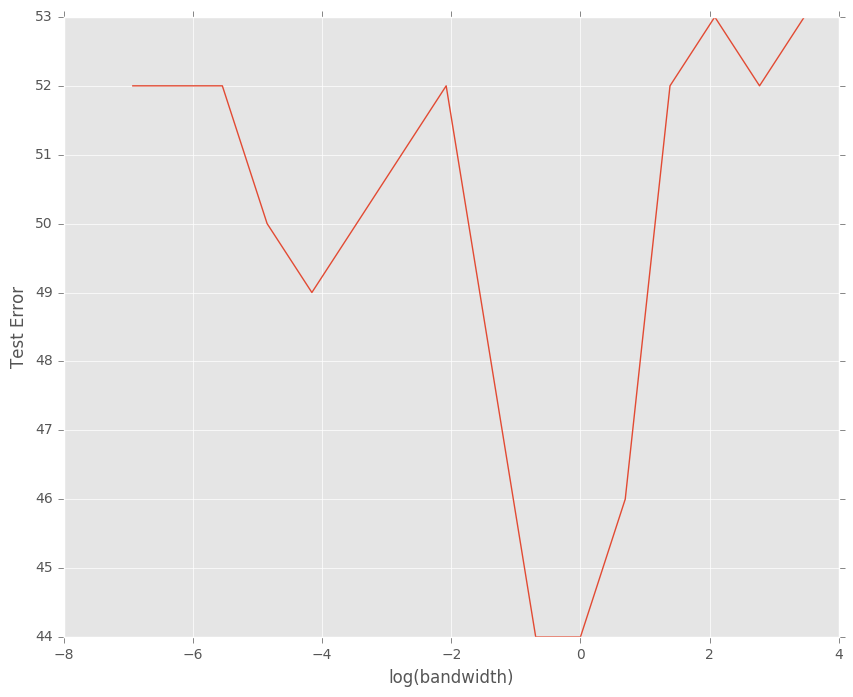

In [349]:
plt.plot(np.log(G),rbf_TE)
plt.ylabel("Test Error")
plt.xlabel("log(bandwidth)")